# 12 Useful Pandas Techniques

Importing modules and loading the data set into Python environment:

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("train(Loan_Prediction).csv", index_col="Loan_ID")

In [2]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y


# STEP 1 – Boolean Indexing

What do you do, if you want to filter values of a column based on conditions from another set of columns? For instance, we want a list of all females who are not graduate and got a loan. Boolean indexing can help here. You can use the following code:

In [3]:
data.loc[(data["Gender"]=="Female") & (data["Education"]=="Not Graduate") & (data["Loan_Status"]=="Y"), 
         ["Gender","Education","Loan_Status"]]

,Gender,Education,Loan_Status
Loan_ID,,,
LP001155,Female,Not Graduate,Y
LP001669,Female,Not Graduate,Y
LP001692,Female,Not Graduate,Y
LP001908,Female,Not Graduate,Y
LP002300,Female,Not Graduate,Y
LP002314,Female,Not Graduate,Y
LP002407,Female,Not Graduate,Y
LP002489,Female,Not Graduate,Y
LP002502,Female,Not Graduate,Y


# STEP 2 – Apply Function

It is one of the commonly used functions for playing with data and creating new variables. Apply returns some value after passing each row/column of a data frame with some function. The function can be both default or user-defined. For instance, here it can be used to find the #missing values in each row and column.

In [4]:
#Create a new function:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(data.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

#Applying per row:
print("\nMissing values per row:")
print(data.apply(num_missing, axis=1)) #axis=1 defines that function is to be applied on each row

Missing values per column:
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values per row:
Loan_ID
LP001002    1
LP001003    0
LP001005    0
LP001006    0
LP001008    0
LP001011    0
LP001013    0
LP001014    0
LP001018    0
LP001020    0
LP001024    0
LP001027    1
LP001028    0
LP001029    0
LP001030    0
LP001032    0
LP001034    1
LP001036    0
LP001038    0
LP001041    2
LP001043    0
LP001046    0
LP001047    0
LP001050    1
LP001052    2
LP001066    0
LP001068    0
LP001073    0
LP001086    0
LP001087    1
           ..
LP002911    0
LP002912    0
LP002916    0
LP002917    0
LP002925    1
LP002926    0
LP002928    0
LP002931    0
LP002933    1
LP002936    0
LP002938    0
LP002940    0
LP002941    0
LP002943    1
LP002945 

.info() can also be used to find all the NON NULL values in the data ,
which can be subtracted from the total to calculate the count of NULL Entries

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


# STEP 3 -Imputing missing files

‘fillna()’ does it in one go. It is used for updating missing values with the overall mean/mode/median of the column. Let’s impute the ‘Gender’, ‘Married’ and ‘Self_Employed’ columns with their respective modes.

In [6]:
def mymode(val):
    dicts={}
    for j in data[val]:
        if j not in dicts:
            dicts[j]=1
        else:
            dicts[j]=dicts[j]+1
    ma=0
    print(dicts)
    for key,value in dicts.items():
        if value>ma and key!='nan':
            ma=value
            final=key
    return final    
mymode('Gender')

{'Male': 489, 'Female': 112, nan: 13}


'Male'

In [7]:
#First we import a function to determine the mode
from scipy.stats import mode
mymode('Gender')

{'Male': 489, 'Female': 112, nan: 13}


'Male'

In [8]:
print(data.apply(num_missing, axis=0))
print("\n\n\n")
#Impute the values:
data['Gender'].fillna(mymode('Gender'), inplace=True)
data['Married'].fillna(mymode('Married'), inplace=True)
data['Self_Employed'].fillna(mymode('Self_Employed'), inplace=True)
print("\n\n\n")
#Now check the #missing values again to confirm:
print(data.apply(num_missing, axis=0))

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64




{'Male': 489, 'Female': 112, nan: 13}
{'No': 213, 'Yes': 398, nan: 3}
{'No': 500, 'Yes': 82, nan: 32}




Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Hence, it is confirmed that missing values are imputed. Please note that this is the most primitive form of imputation. Other sophisticated techniques include modeling the missing values, using grouped averages (mean/mode/median).

# Step 4 – Pivot Table

Pandas can be used to create MS Excel style pivot tables. For instance, in this case, a key column is “LoanAmount” which has missing values. We can impute it using mean amount of each ‘Gender’, ‘Married’ and ‘Self_Employed’ group. The mean ‘LoanAmount’ of each group can be determined as:

In [9]:
#Determine pivot table
impute_grps = data.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed"], aggfunc=np.mean)
print(impute_grps)

                              LoanAmount
Gender Married Self_Employed            
Female No      No             114.691176
               Yes            125.800000
       Yes     No             134.222222
               Yes            282.250000
Male   No      No             129.936937
               Yes            180.588235
       Yes     No             153.882736
               Yes            169.395833


# STEP 5- Multi-Indexing

An index if is made up of a combination of 3 values. This is called Multi-Indexing. It helps in performing operations really fast.

In [10]:
print (data.apply(num_missing, axis=0))
#iterate only through rows with missing LoanAmount
for i,row in data.loc[data['LoanAmount'].isnull(),:].iterrows():
  ind = tuple([row['Gender'],row['Married'],row['Self_Employed']])
  data.loc[i,'LoanAmount'] = impute_grps.loc[ind].values[0]

#Now check the #missing values again to confirm:
print(data.apply(num_missing, axis=0))

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Note:

    1)Multi-index requires tuple for defining groups of indices in loc statement. This a tuple used in function.
    2)The .values[0] suffix is required because, by default a series element is returned which has an index not matching with that of the dataframe. In this case, a direct assignment gives an error.

# STEP 6. Crosstab

This function is used to get an initial “feel” (view) of the data. Here, we can validate some basic hypothesis. For instance, in this case, “Credit_History” is expected to affect the loan status significantly. This can be tested using cross-tabulation as shown below:

In [11]:
pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


These are absolute numbers. But, percentages can be more intuitive in making some quick insights. We can do this using the apply function:

In [12]:
def percConvert(ser):
  return ser/float(ser[-1])
pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True).apply(percConvert, axis=1)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.204211,0.795789,1.0
All,0.317376,0.682624,1.0


Now, it is evident that people with a credit history have much higher chances of getting a loan as 80% people with credit history got a loan as compared to only 9% without credit history.

But that’s not it. It tells an interesting story. Since I know that having a credit history is super important, what if I predict loan status to be Y for ones with credit history and N otherwise. Surprisingly, we’ll be right 82+378=460 times out of 614 which is a whopping 75%!

I won’t blame you if you’re wondering why the hell do we need statistical models. But trust me, increasing the accuracy by even 0.001% beyond this mark is a challenging task. Would you take this challenge?

Note: 75% is on train set. The test set will be slightly different but close. Also, I hope this gives some intuition into why even a 0.05% increase in accuracy can result in jump of 500 ranks on the Kaggle leaderboard.

# STEP 7 – Merge DataFrames

Merging dataframes become essential when we have information coming from different sources to be collated. Consider a hypothetical case where the average property rates (INR per sq meters) is available for different property types. Let’s define a dataframe as:

In [13]:
prop_rates = pd.DataFrame([1000, 5000, 12000], index=['Rural','Semiurban','Urban'],columns=['rates'])
prop_rates

,rates
Rural,1000
Semiurban,5000
Urban,12000


Now we can merge this information with the original dataframe as:

In [14]:
data_merged = data.merge(right=prop_rates, how='inner',left_on='Property_Area',right_index=True, sort=False)
data_merged

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,rates
Loan_ID,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,129.936937,360.0,1.0,Urban,Y,12000
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,12000
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,12000
LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,12000
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,12000
LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y,12000
LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y,12000
LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.000000,360.0,1.0,Urban,Y,12000
LP001027,Male,Yes,2,Graduate,No,2500,1840.0,109.000000,360.0,1.0,Urban,Y,12000


In [15]:
data_merged.pivot_table(values='Credit_History',index=['Property_Area','rates'], aggfunc=len)

,,Credit_History
Property_Area,rates,
Rural,1000,179.0
Semiurban,5000,233.0
Urban,12000,202.0


The pivot table validates successful merge operation. Note that the ‘values’ argument is irrelevant here because we are simply counting the values.

# STEP 8 – Sorting DataFrames

In [16]:
data_sorted = data.sort_values(['ApplicantIncome','CoapplicantIncome'], ascending=False)
data_sorted[['ApplicantIncome','CoapplicantIncome']].head(10)

,ApplicantIncome,CoapplicantIncome
Loan_ID,,
LP002317,81000,0.0
LP002101,63337,0.0
LP001585,51763,0.0
LP001536,39999,0.0
LP001640,39147,4750.0
LP002422,37719,0.0
LP001637,33846,0.0
LP001448,23803,0.0
LP002624,20833,6667.0


# STEP 9 – Plotting (Boxplot & Histogram)

if we want to compare the distribution of ApplicantIncome by Loan_Status:

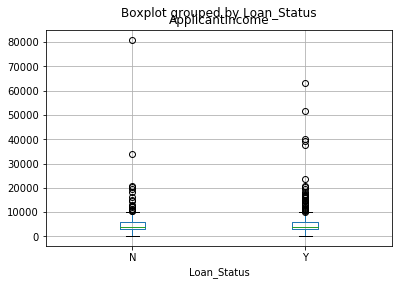

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
data.boxplot(column="ApplicantIncome",by="Loan_Status")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001486E67F710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001486E70C2E8>], dtype=object)

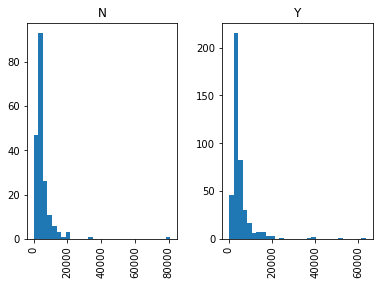

In [18]:
data.hist(column="ApplicantIncome",by="Loan_Status",bins=30)

This shows that income is not a big deciding factor on its own as there is no appreciable difference between the people who received and were denied the loan.

# STEP 10 – Cut function for binning

Sometimes numerical values make more sense if clustered together. For example, if we’re trying to model traffic (#cars on road) with time of the day (minutes). The exact minute of an hour might not be that relevant for predicting traffic as compared to actual period of the day like “Morning”, “Afternoon”, “Evening”, “Night”, “Late Night”. Modeling traffic this way will be more intuitive and will avoid overfitting.

Here we define a simple function which can be re-used for binning any variable fairly easily.

In [19]:
#Binning:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]
  print(break_points)
  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

#Binning age:
cut_points = [90,140,190]
labels = ["low","medium","high","very high"]
data["LoanAmount_Bin"] = binning(data["LoanAmount"], cut_points, labels)
print(pd.value_counts(data["LoanAmount_Bin"], sort=False))

[9.0, 90, 140, 190, 700.0]
high         146
low          104
medium       273
very high     91
Name: LoanAmount_Bin, dtype: int64


In [20]:
data


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Bin
Loan_ID,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,129.936937,360.0,1.0,Urban,Y,medium
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,medium
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,low
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,medium
LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,high
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,very high
LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y,medium
LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N,high
LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y,high


# STEP 11 – Coding nominal data

Often, we find a case where we’ve to modify the categories of a nominal variable. This can be due to various reasons:

    1)Some algorithms (like Logistic Regression) require all inputs to be numeric. So nominal variables are mostly coded as 0, 1….(n-1)
    2)Sometimes a category might be represented in 2 ways. For e.g. temperature might be recorded as “High”, “Medium”, “Low”, “H”, “low”. Here, both “High” and “H” refer to same category. Similarly, in “Low” and “low” there is only a difference of case. But, python would read them as different levels.
    3)Some categories might have very low frequencies and its generally a good idea to combine them.

In [21]:
#Define a generic function using Pandas replace function
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded
 
#Coding LoanStatus as Y=1, N=0:
print('Before Coding:')
print(pd.value_counts(data["Loan_Status"]))
data["Loan_Status_Coded"] = coding(data["Loan_Status"], {'N':0,'Y':1})
print('\nAfter Coding:')
print(pd.value_counts(data["Loan_Status_Coded"]))

Before Coding:
Y    422
N    192
Name: Loan_Status, dtype: int64

After Coding:
1    422
0    192
Name: Loan_Status_Coded, dtype: int64


# STEP 12 – Iterating over rows of a dataframe

This is not a frequently used operation. Still, you don’t want to get stuck. Right? At times you may need to iterate through all rows using a for loop. For instance, one common problem we face is the incorrect treatment of variables in Python. This generally happens when:

    Nominal variables with numeric categories are treated as numerical.
    Numeric variables with characters entered in one of the rows (due to a data error) are considered categorical.

So it’s generally a good idea to manually define the column types. If we check the data types of all columns:

In [22]:
data.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
LoanAmount_Bin       category
Loan_Status_Coded       int64
dtype: object

Here we see that Credit_History is a nominal variable but appearing as float. A good way to tackle such issues is to create a csv file with column names and types. This way, we can make a generic function to read the file and assign column data types.

In [23]:
#Load the file:
import pandas as pd
colTypes = pd.read_csv('datatypes.csv')

After loading this file, we can iterate through each row and assign the datatype using column ‘type’ to the variable name defined in the ‘feature’ column.

In [24]:
colTypes

,feature,type
0,Loan_ID,categorical
1,Gender,categorical
2,Married,categorical
3,Dependents,categorical
4,Education,categorical
5,Self_Employed,categorical
6,ApplicantIncome,continuous
7,CoapplicantIncome,continuous
8,LoanAmount,continuous
9,Loan_Amount_Term,continuous


In [25]:
#Iterate through each row and assign variable type.
#Note: astype is used to assign types
for i, row in colTypes.iterrows():#i: dataframe index; row: each row in series format
    if row['feature']=='Loan_ID':
        continue
    if row['type']=="categorical":
        data[row['feature']]=data[row['feature']].astype(np.object)
    elif row['type']=="continuous":
        data[row['feature']]=data[row['feature']].astype(np.float)
print(data.dtypes)

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome       float64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History         object
Property_Area          object
Loan_Status            object
LoanAmount_Bin       category
Loan_Status_Coded       int64
dtype: object


In [26]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Bin,Loan_Status_Coded
Loan_ID,,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849.0,0.0,129.936937,360.0,1,Urban,Y,medium,1
LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1,Rural,N,medium,0
LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1,Urban,Y,low,1
LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1,Urban,Y,medium,1
LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1,Urban,Y,high,1
LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.000000,360.0,1,Urban,Y,very high,1
LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.000000,360.0,1,Urban,Y,medium,1
LP001014,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.000000,360.0,0,Semiurban,N,high,0
LP001018,Male,Yes,2,Graduate,No,4006.0,1526.0,168.000000,360.0,1,Urban,Y,high,1


Now the credit history column is modified to ‘object’ type which is used for representing nominal variables in Pandas.

### RESOURCES:

https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/

https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/

Pandas Selecting and Indexing: http://pandas.pydata.org/pandas-docs/stable/indexing.html

Pandas Reference (apply):http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html#pandas.DataFrame.apply

 Pandas Reference (fillna):http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna

Pandas Reference (Pivot Table):http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html#pandas.DataFrame.pivot_table

Pandas Reference (crosstab):http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.crosstab.html

Pandas Reference (merge):http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html#pandas.DataFrame.merge

Pandas Reference (sort_values):http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values

Pandas Reference (hist) | Pandas Reference (boxplot):http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html#pandas.DataFrame.hist

Pandas Reference (cut):http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.cut.html

Pandas Reference (replace): http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html#pandas.DataFrame.replace

Pandas Reference (iterrows):http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html#pandas.DataFrame.iterrows